In [15]:
%load_ext autoreload

In [27]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import handytools.navigator as nav
import handytools.visualizer as vis
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper, get_drr_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16b_layer, ResNet18_layer

In [17]:
def get_prs(R_fills, R_outlines, hkeys, verbose=False):
    prs = {}
    respdic = {}
    for hkey in hkeys:
        R_fill = R_fills[hkey]
        R_outline = R_outlines[hkey]

        prs[hkey] = np.array([])
        respdic[hkey] = []
        
        for unit in range(R_fill.shape[0]):
            resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
            if resp:
                pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
                prs[hkey] = np.append(prs[hkey], pr)
                respdic[hkey].append(int(unit))
            else:
                prs[hkey] = np.append(prs[hkey], np.nan)
                if verbose: print(f"Layer {hkey}, unit {unit} not responsive!")
    return prs, respdic

In [28]:
# params
hkeys = list(VGG16b_layer.keys())
mtype = "VGG16b"

# params
xn = 227
sz = 50
lw = 1.5
fg = 1.0
bg = 0.0

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

Executing the follow missing keys:  []
Executing the follow missing keys:  []


In [30]:
TI = {}
for hkey in hkeys:
    Rc = nav.npload(nav.resultpath, f"responses_{mtype}", f"hkey={hkey}_TKRc.npy")
    TI[hkey] = []

    for Runit in Rc:
        Rshape = Runit[:225]
        Rtexture = Runit[225:]
        TI[hkey].append(np.std(Rtexture)/np.std(Rshape))

/tmp/ipykernel_66755/1294394116.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  TI[hkey].append(np.std(Rtexture)/np.std(Rshape))
/tmp/ipykernel_66755/1294394116.py:9: RuntimeWarning: invalid value encountered in scalar divide
  TI[hkey].append(np.std(Rtexture)/np.std(Rshape))


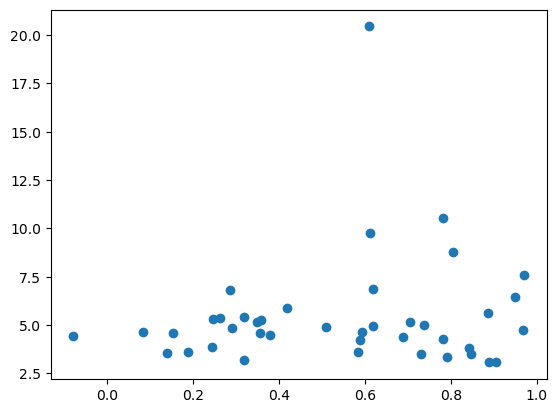

In [31]:
prs_an_foi, resp = get_prs(R_fills, R_outlines, hkeys)

for hkey in hkeys[1:]:
    foi = prs_an_foi[hkey][resp[hkey]]
    ti = np.array(TI[hkey])[resp[hkey]]
    
    plt.scatter(foi, ti)
    break